<a href="https://colab.research.google.com/github/quantumdolphin/ML-course/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 🧹 Data Cleaning & Outlier Detection Notebook

In [7]:
# 1. Setup: Create Sample DataFrame with Common Issues
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate messy data
data = {
    'id':     [1, 2, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 3, 5, 10],
    'age':    [25, 30, 30, 22, np.nan, 35, 40, 100, 28, 28, 26, 29, 22, 35, 29],  # ages repeated for some ids
    'state':  ['NY', 'ny', 'ny', 'TX', 'TX', 'CA', 'CA', 'NY', 'CA', 'CA', 'CA', 'CA', 'TX', 'CA', 'CA'],
    'income': [50000, 60000, 60000, 40000, 80000, 20000, 70000, None, 1000000, 1000000, 58000, 62000, 40000, 20000, 62000],
    'gender': ['M', 'F', 'F', 'F', 'M', 'M', np.nan, 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'M']
}

df = pd.DataFrame(data)
df


,id,age,state,income,gender
0,1,25.0,NY,50000.0,M
1,2,30.0,ny,60000.0,F
2,2,30.0,ny,60000.0,F
3,3,22.0,TX,40000.0,F
4,4,NaN,TX,80000.0,M
5,5,35.0,CA,20000.0,M
6,6,40.0,CA,70000.0,NaN
7,7,100.0,NY,NaN,F
8,8,28.0,CA,1000000.0,F
9,8,28.0,CA,1000000.0,F


In [8]:
print(df.info())
print(df.describe(include='all'))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15 non-null     int64  
 1   age     14 non-null     float64
 2   state   15 non-null     object 
 3   income  14 non-null     float64
 4   gender  14 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 732.0+ bytes
None
               id         age state          income gender
count   15.000000   14.000000    15       14.000000     14
unique        NaN         NaN     4             NaN      2
top           NaN         NaN    CA             NaN      M
freq          NaN         NaN     8             NaN      7
mean     5.533333   34.214286   NaN   187285.714286    NaN
std      3.020564   19.573053   NaN   344739.462063    NaN
min      1.000000   22.000000   NaN    20000.000000    NaN
25%      3.000000   26.500000   NaN    42500.000000    NaN
50%      5.000000   29.000000   NaN 

## What does `df.info()` tell you in Pandas?

- **Number of rows and columns:** Shows the shape of your DataFrame.
- **Column names and their order:** Lists each column in order.
- **Data types:** Displays the data type of each column (e.g., `int64`, `float64`, `object` for strings).
- **Non-null count:** Shows how many non-missing (non-null) values each column has, making it easy to spot missing data.
- **Memory usage:** Tells you how much RAM the DataFrame is using.

**Tip:**  
If a column's non-null count is less than the total number of rows, it means that column has missing values.


## Understanding `df.describe(include='all')` in Pandas

- When you run `df.describe(include='all')`, Pandas shows both numeric and categorical statistics for every column—even if some stats don’t make sense for that column type.
- **Numeric columns** (like `age`, `income`) will display values for stats such as mean and standard deviation, but will show `NaN` for categorical stats like `unique`, `top`, and `freq` because those don’t apply to numbers.
- **Categorical columns** (like `state`, `gender`) will display values for stats like `unique`, `top`, and `freq`, but show `NaN` for numeric stats (mean, std, min, max, etc.) because those don’t apply to text.

**In short:**  
If you see `NaN` in the summary table, it just means “not applicable” for that particular statistic and column.


In [11]:
#FIND DUPLICATES
#print(df.duplicated())
# Print total number of duplicate rows (excluding first occurrences)
print("Number of duplicate rows:", df.duplicated().sum())

# Optionally: Show all duplicate rows (excluding the first occurrence)
print("Duplicate rows (excluding the first occurrence):")
print(df[df.duplicated()])

Number of duplicate rows: 5
Duplicate rows (excluding the first occurrence):
    id   age state     income gender
2    2  30.0    ny    60000.0      F
9    8  28.0    CA  1000000.0      F
12   3  22.0    TX    40000.0      F
13   5  35.0    CA    20000.0      M
14  10  29.0    CA    62000.0      M


## What does `.duplicated()` do in Pandas?

- `.duplicated()` returns a **Boolean Series** indicating whether each row is a duplicate of a previous row in the DataFrame.
- A value of `True` means “this row is a duplicate of an earlier row.”
- A value of `False` means “this row is unique so far.”

**How does it work?**
- By default, `.duplicated()` checks all columns.
- The **first occurrence** of each unique row is marked `False`.
- Any further identical rows are marked `True`.



In [13]:
print("Total rows before removing duplicates:", len(df))

df_clean = df.drop_duplicates()

print("Total rows after removing duplicates:", len(df_clean))
print("After removing duplicates:")
#print(df_clean)


Total rows before removing duplicates: 15
Total rows after removing duplicates: 10
After removing duplicates:


In [20]:
# Make an explicit copy to avoid SettingWithCopyWarning
# This ensures that subsequent operations (like standardizing text columns)
# are performed safely on a true copy, not a view of the original DataFrame.
df_clean = df_clean.copy()



## What does `drop_duplicates()` do in Pandas?

- `drop_duplicates()` **removes rows in your DataFrame that are exact duplicates of earlier rows.**
- By default, it **keeps the first occurrence** of each unique row and **drops any subsequent duplicates**.
- Rows are considered duplicates if **all their column values match exactly** (unless you specify certain columns with `subset`).


In [18]:
# Find all text (object) columns in your DataFrame
text_cols = df.select_dtypes(include='object').columns
print("Text columns are:", list(text_cols))


Text columns are: ['state', 'gender']


## How and Why to Standardize Text Columns

- **Why?**  
  Text columns often contain inconsistencies such as differences in capitalization, extra spaces, or typos (e.g., `"CA"` vs `" ca "` vs `"Ca"`).  
  Standardizing makes your data more consistent, helps prevent errors in analysis, and ensures that values meant to be the same are actually treated as equal.

- **How to standardize:**  
  - Remove extra spaces at the beginning or end (`str.strip()`).
  - Convert all text to the same case, usually uppercase (`str.upper()`) or lowercase (`str.lower()`).
  - (Optional) Replace common misspellings or typos.


In [19]:
# Remove leading/trailing spaces and convert to uppercase
df_clean['state'] = df_clean['state'].str.strip().str.upper()
print(df_clean['state'].value_counts())
# Remove leading/trailing spaces and convert to uppercase
df_clean['gender'] = df_clean['gender'].str.strip().str.upper()
print(df_clean['gender'].value_counts())


state
CA    5
NY    3
TX    2
Name: count, dtype: int64
gender
M    5
F    4
Name: count, dtype: int64


## Handling Missing Values

In this step, we check for and fill in missing values in our DataFrame:

- `df_clean.isnull().sum()`  
  Prints the number of missing values in each column.

- `df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())`  
  Fills missing values in the `age` column with the **median age** of the dataset. Median is robust to outliers.

- `df_clean['income'] = df_clean['income'].fillna(df_clean['income'].median())`  
  Fills missing values in the `income` column with the **median income**.

- `df_clean['gender'] = df_clean['gender'].fillna(df_clean['gender'].mode()[0])`  
  Fills missing values in the `gender` column with the **most common value** (the mode) in that column.

**Why do this?**  
Filling missing values helps ensure that your dataset is complete and ready for analysis or machine learning, since many algorithms cannot handle missing data directly. Choosing the median (for numeric columns) and mode (for categorical columns) is a common and simple strategy to avoid introducing bias from extreme values or rare categories.
## Other Ways to Fill in Missing Values

Besides using the **median**, you can fill missing values with:

- **Mean**  
  Good when data is normally distributed and you want to use the average value.
- **Constant value**  
  Useful for marking missing entries explicitly (e.g., with 0 or 'Unknown').
- **Forward/Backward Fill**  
  Propagates previous/next valid value, useful for time series.
- **Interpolate**  
  Estimates missing values based on other value

## Checking for Normal Distribution and Understanding Kurtosis

**Step 1: Check for Normality (Visual Inspection)**
- Plot a **histogram** and **boxplot** for each numeric column to see if the data follows a bell curve (normal distribution).
- If the distribution is symmetric, unimodal (one peak), and has few outliers, it is likely close to normal.

**Step 2: Understand Kurtosis**
- **Kurtosis** measures how “heavy” or “light” the tails of your distribution are (i.e., the tendency for outliers).
    - **High kurtosis:** more outliers than normal (fat tails).
    - **Low kurtosis:** fewer outliers (thin tails).
    - **Normal kurtosis:** similar to normal distribution.
- **In pandas, kurtosis of 0 means

In [21]:
print(df_clean.isnull().sum())
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
df_clean['income'] = df_clean['income'].fillna(df_clean['income'].median())
df_clean['gender'] = df_clean['gender'].fillna(df_clean['gender'].mode()[0])


id        0
age       1
state     0
income    1
gender    1
dtype: int64


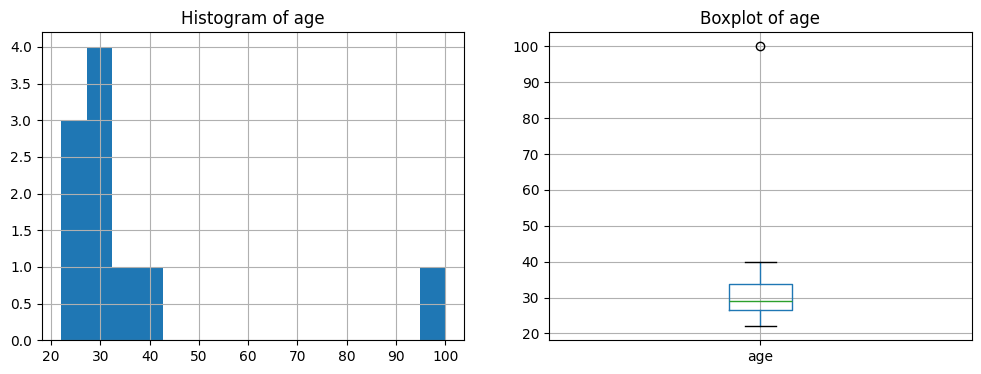

Kurtosis of age: 8.68 (0 = normal, >0 = heavy tails, <0 = light tails)


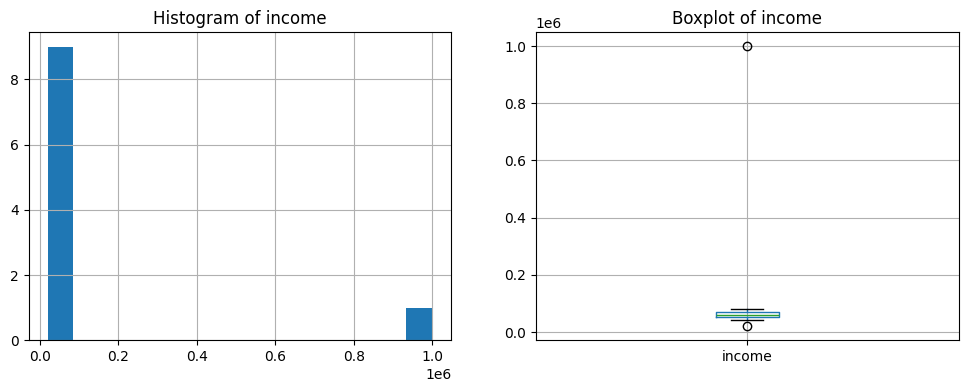

Kurtosis of income: 9.92 (0 = normal, >0 = heavy tails, <0 = light tails)
age: mean = 36.40, median = 29.00, mode = 29.0
income: mean = 150000.00, median = 60000.00, mode = 60000.0


In [23]:
import matplotlib.pyplot as plt

# List your numeric columns
num_cols = ['age', 'income']

for col in num_cols:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    df_clean[col].hist(bins=15)
    plt.title(f'Histogram of {col}')
    plt.subplot(1, 2, 2)
    df_clean.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

    kurt = df_clean[col].kurt()
    print(f"Kurtosis of {col}: {kurt:.2f} (0 = normal, >0 = heavy tails, <0 = light tails)")

for col in num_cols:
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    mode_val = df_clean[col].mode()[0]
    print(f"{col}: mean = {mean_val:.2f}, median = {median_val:.2f}, mode = {mode_val}")

## Using Histograms to Spot Outliers in Numeric Columns

- **Histograms** are a powerful tool for visualizing the distribution of numeric data.
- When you plot a histogram for a column (like `age` or `income`), most data points should fall within a central range if the data is normal or close to normal.
- **Outliers** will appear as bars that are far away from the main cluster of values, often isolated at one or both ends of the plot.


## Interpreting Mean, Median, Mode, and Kurtosis for `income`

- When the **mean** is much higher than the **median** and **mode**, this suggests the distribution is **right-skewed**: a few very large incomes pull the mean upward, but most data is clustered at lower values.
- The **median** (middle value) and **mode** (most common value) are close together and much lower than the mean—indicating that these are more typical income levels for most people in the dataset.
- **High kurtosis** (much greater than 0) indicates heavy tails—many more extreme outlier values than a normal distribution would have.
- In real-world data, this is very common for income: most people earn near the median/mode, but a few individuals have exceptionally high incomes (outliers).

**Summary:**  
If mean > median > mode and kurtosis is high, your data is right-skewed with a long tail of large values and lots of outliers.

---

## Alternative Plots for Visualizing Distribution

Besides **histograms** and **boxplots**, you can try:

- **Log-Transformed Histogram:** Compresses large values to reveal both the bulk and tail of the data.
- **Violin Plot:** Combines boxplot and kernel density estimate for richer shape visualization.
- **Strip Plot / Swarm Plot:** Plots each data point; great for seeing clustering and gaps.
- **Empirical Cumulative Distribution Function (ECDF):** Shows
## What if Mean < Median < Mode and Kurtosis is High?

- When the **mean** is much lower than the **median**, which is in turn lower than the **mode**, your data is **left-skewed** (negatively skewed).
- This means most values are clustered at the higher end, but there is a **long tail of smaller (low) values** pulling the mean down.
- **High kurtosis** in this scenario means there are many unusually low outliers—more than expected in a normal distribution.

**Summary:**  
If mean < median < mode and kurtosis is high, your data is **left-skewed** with a long tail of small values and a significant number of low outliers.

**Example in real life:**  
Left skew can occur with variables like exam scores in an easy test (most students score high, but a few very low scores create a left tail), or ages at retirement in a place where most people retire at an older age,


In [24]:
# 7. Outlier Detection and Removal (IQR method)
Q1 = df_clean['income'].quantile(0.25)
Q3 = df_clean['income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Income outlier bounds: {lower_bound:.2f} to {upper_bound:.2f}")
outliers = df_clean[(df_clean['income'] < lower_bound) | (df_clean['income'] > upper_bound)]
print("Outlier rows:\n", outliers)
df_no_outliers = df_clean[(df_clean['income'] >= lower_bound) & (df_clean['income'] <= upper_bound)]
print("After removing outliers:")
print(df_no_outliers)



Income outlier bounds: 28000.00 to 92000.00
Outlier rows:
    id   age state     income gender
5   5  35.0    CA    20000.0      M
8   8  28.0    CA  1000000.0      F
After removing outliers:
    id    age state   income gender
0    1   25.0    NY  50000.0      M
1    2   30.0    NY  60000.0      F
3    3   22.0    TX  40000.0      F
4    4   29.0    TX  80000.0      M
6    6   40.0    CA  70000.0      M
7    7  100.0    NY  60000.0      F
10   9   26.0    CA  58000.0      M
11  10   29.0    CA  62000.0      M


## Detecting Outliers Using the Interquartile Range (IQR) Method

**The IQR method** is a common way to identify outliers in numeric data, like `income`. Here’s how it works:

1. **Calculate the quartiles:**
   - **Q1:** The 25th percentile (value below which 25% of the data falls)
   - **Q3:** The 75th percentile (value below which 75% of the data falls)
2. **Compute the IQR:**
   - **IQR = Q3 - Q1**
3. **Determine outlier bounds:**
   - **Lower bound:** Q1 - 1.5 × IQR
   - **Upper bound:** Q3 + 1.5 × IQR
4. **Any value below the lower bound or above the upper bound is considered an outlier.**

---

**Example with `income`:**

- **Income outlier bounds:**  
  Lower: `28,000.00`  
  Upper: `92,000.00`

Here, 20,000 (below lower bound) and 1,000,000 (above upper bound) are outliers.



In [25]:
# 8. More Data Cleaning Examples
# a) Categorical Encoding
df_no_outliers['gender_num'] = df_no_outliers['gender'].map({'M': 0, 'F': 1})

# b) Remove Irrelevant Columns
df_no_outliers = df_no_outliers.drop(columns=['id'])

# c) Creating New Features
df_no_outliers['income_per_age'] = df_no_outliers['income'] / df_no_outliers['age']

/tmp/ipython-input-25-3975238158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['gender_num'] = df_no_outliers['gender'].map({'M': 0, 'F': 1})
